In [1]:
import numpy as np
import matplotlib.pyplot as plt

metapath embedding 欧几里得距离迭代图
train loss 迭代图
downstream task 两种方法 loss 对比图

下游任务 f1_score 采样数量的关系
欧几里得距离矩阵
余弦相似度距离矩阵

In [2]:
suffix = "_" + "IMDB" + "_" + "4096" + "_" + "128" + ".txt"

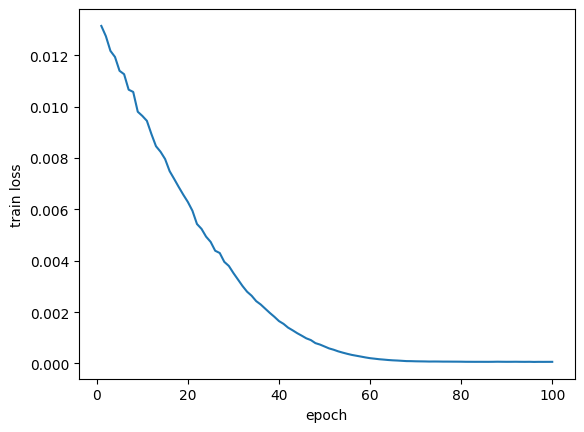

In [3]:
train_loss_path = "result/train_loss" + suffix
train_loss = np.loadtxt(train_loss_path)

plt.xlabel("epoch")
plt.ylabel("train loss")
plt.plot(np.arange(1, len(train_loss) + 1), train_loss)

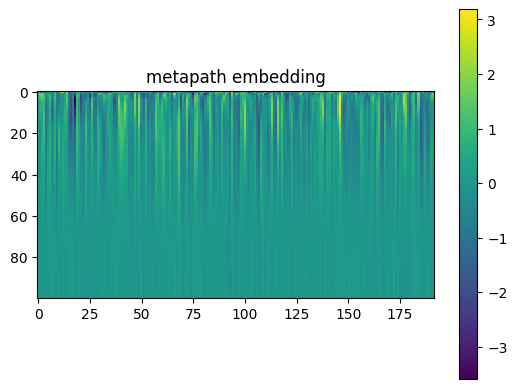

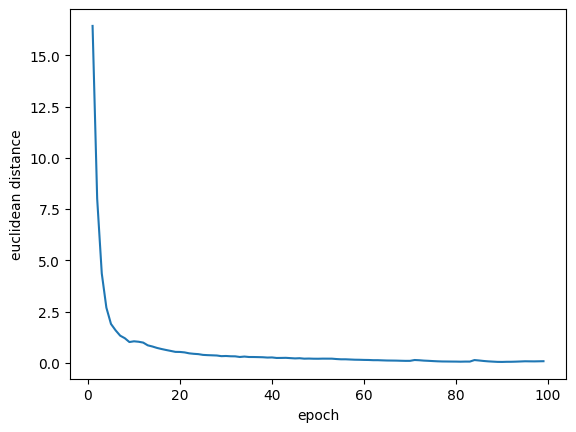

In [4]:
epochs = 100

all_metapath_embeddings = []

for i in range(epochs):
    metapath_embeddings_path = "result/metapath_embedding_" + "round" + str(i) + suffix
    all_metapath_embeddings.append(np.loadtxt(metapath_embeddings_path).tolist())

metapath_label = 0
metapath_embeddings0 = []

for i in range(epochs):
    metapath_embeddings0.append(all_metapath_embeddings[i][0])

# 绘制热力图
plt.imshow(metapath_embeddings0, cmap='viridis', interpolation='nearest')
plt.colorbar()  # 添加颜色条
plt.title('metapath embedding')
plt.show()

dists = []
for i in range(epochs - 1):
    dists.append(np.linalg.norm(np.array(all_metapath_embeddings[i + 1][0]) - np.array(all_metapath_embeddings[i][0])))

plt.xlabel("epoch")
plt.ylabel("euclidean distance")
plt.plot(np.arange(1, len(dists) + 1), dists)



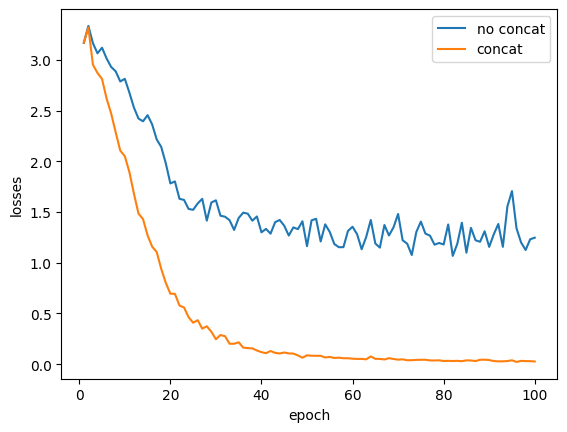

In [5]:
downstream_losses_path = "result/downstream_losses" + suffix
downstream_losses = np.loadtxt(downstream_losses_path)

n = len(downstream_losses)
instance_loss = downstream_losses[:n // 2]
instance_concat_loss = downstream_losses[n // 2:]

plt.xlabel("epoch")
plt.ylabel("losses")
plt.plot(np.arange(1, len(instance_loss) + 1), instance_loss, label="no concat")
plt.plot(np.arange(1, len(instance_concat_loss) + 1), instance_concat_loss, label="concat")
plt.legend()

embedding euclidean distance heatmap

/tmp/ipykernel_1231933/1129587838.py:18: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 1400x1200 with 0 Axes> which fig.colorbar is called on.
  plt.colorbar(cax)


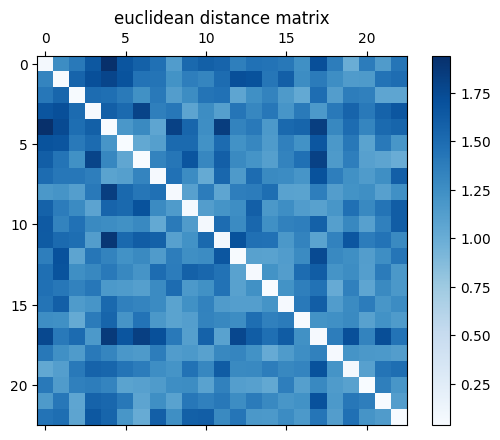

<Figure size 1400x1200 with 0 Axes>

In [14]:
euclidean_distance_path_prefix = "result/euclidean_distance"
metapath_cnt = 23
dist_matrix = []
for i in range(metapath_cnt):
    cur_vector = []
    for j in range(metapath_cnt):
        file_path = euclidean_distance_path_prefix + "_" + str(i) + "_" + str(j) + suffix
        cur_vector.append(np.mean(np.loadtxt(file_path)))
    dist_matrix.append(cur_vector)

dist_matrix = np.array(dist_matrix)

fig, ax = plt.subplots()
cax = ax.matshow(dist_matrix, cmap='Blues')
plt.title('euclidean distance matrix')

plt.figure(figsize=(14, 12))
plt.colorbar(cax)
plt.show()


/tmp/ipykernel_1231933/1406550229.py:18: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 1400x1200 with 0 Axes> which fig.colorbar is called on.
  plt.colorbar(cax)


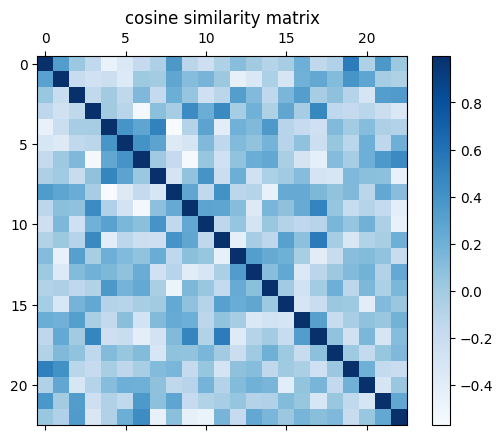

<Figure size 1400x1200 with 0 Axes>

In [ ]:
cosine_similarity_path_prefix = "result/cosine_similarity"
metapath_cnt = 23
dist_matrix = []
for i in range(metapath_cnt):
    cur_vector = []
    for j in range(metapath_cnt):
        file_path = cosine_similarity_path_prefix + "_" + str(i) + "_" + str(j) + suffix
        cur_vector.append(np.mean(np.loadtxt(file_path)))
    dist_matrix.append(cur_vector)

dist_matrix = np.array(dist_matrix)

fig, ax = plt.subplots()
cax = ax.matshow(dist_matrix, cmap='Blues')
plt.title('cosine similarity matrix')

plt.figure(figsize=(14, 12))
plt.colorbar(cax)
plt.show()

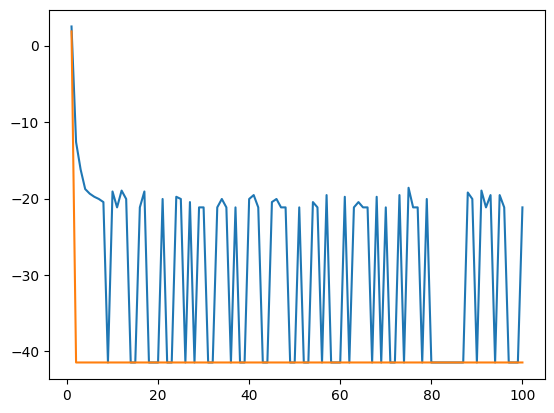

In [8]:
epsilon = 1e-18

loss1 = np.array([
    12.278455892867896, 3.312456868798108e-06, 9.199828143735544e-08, 7.126641721200144e-09,
    3.887258070989219e-09, 2.5915058987635575e-09, 1.9436294795838194e-09, 1.2957530604040812e-09,
    0.0, 5.183011020370998e-09, 6.478765302020406e-10, 5.830887772617643e-09,
    1.9436294795838194e-09, 0.0, 0.0, 6.478765302020406e-10,
    5.183011353437905e-09, 0.0, 0.0, 0.0,
    1.9436294795838194e-09, 0.0, 0.0, 2.5915056767189526e-09,
    1.9436294795838194e-09, 0.0, 1.2957530604040812e-09, 0.0,
    6.478765302020406e-10, 6.478765302020406e-10, 0.0, 0.0,
    6.478765302020406e-10, 1.9436294795838194e-09, 6.478765302020406e-10, 0.0,
    6.478765302020406e-10, 0.0, 0.0, 1.9436294795838194e-09,
    3.2393825399879006e-09, 6.478765302020406e-10, 0.0, 0.0,
    1.2957529493817788e-09, 1.9436294795838194e-09, 6.478765302020406e-10, 6.478765302020406e-10,
    0.0, 0.0, 6.478765302020406e-10, 0.0,
    0.0, 1.2957530604040812e-09, 6.478765302020406e-10, 0.0,
    3.2393822069209932e-09, 0.0, 0.0, 0.0,
    2.59150600978586e-09, 0.0, 6.478765302020406e-10, 1.2957529493817788e-09,
    6.478765302020406e-10, 6.478765302020406e-10, 0.0, 2.5915056767189526e-09,
    0.0, 6.478765302020406e-10, 0.0, 0.0,
    3.239381873854086e-09, 0.0, 8.422391672979757e-09, 6.478765302020406e-10,
    6.478765302020406e-10, 0.0, 1.9436294795838194e-09, 0.0,
    0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 4.535135156302772e-09,
    1.9436294795838194e-09, 0.0, 5.830885996260804e-09, 6.478765302020406e-10,
    3.2393822069209932e-09, 0.0, 3.2393825399879006e-09, 6.478765302020406e-10,
    0.0, 0.0, 0.0, 6.478765302020406e-10
])

loss2 = np.array([
    6.427323040154709, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
])

loss1 = np.log(loss1 + epsilon)
loss2 = np.log(loss2 + epsilon)

plt.plot(np.arange(1, len(loss1) + 1), loss1)
plt.plot(np.arange(1, len(loss2) + 1), loss2)

2.0178e-10 0